In [1]:
from src.FunctionsProperties import *
import matplotlib.pyplot as plt

## Create all_files

In [2]:
# Create folders to Results
make_results_folders()
move_to_data()

In [2]:
def all_properties_file2(N, dim, alpha_a, alpha_g):
    # Diretório onde os arquivos estão localizados
    path_d = f"../../data_2/N_{N}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/prop"
    path_save = f"../../data_2/N_{N}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}"
    print(f"N = {N}, dim = {dim}, alpha_a = {alpha_a}, alpha_g = {alpha_g}")
    
    # Arquivos a serem atualizados
    properties_file = os.path.join(path_save, "properties_set.txt")
    filenames_file = os.path.join(path_save, "filenames.txt")
    
    # Verificar se o diretório 'prop' existe
    if not os.path.exists(path_d):
        print(f"O diretório {path_d} não existe. Nada a ser feito.")
        return
    
    # Obter todos os arquivos CSV na pasta prop
    all_files = glob.glob(os.path.join(path_d, "*.csv"))
    
    # Se não houver arquivos na pasta prop, nada é feito
    if not all_files:
        print(f"A pasta {path_d} está vazia. Nada a ser feito.")
        return
    
    # Checar se o arquivo filenames.txt existe, caso contrário criar um
    if os.path.exists(filenames_file):
        with open(filenames_file, 'r') as f:
            filenames_set = set(f.read().splitlines())  # Ler todos os arquivos já processados
    else:
        filenames_set = set()
    
    # Se o arquivo properties_set.txt existir, carregar o dataframe, caso contrário criar um novo
    if os.path.exists(properties_file):
        df = pd.read_csv(properties_file, sep=' ')
    else:
        df = pd.DataFrame(columns=["#short_path", "#diamater", "#ass_coeff"])
    
    # Variável para rastrear se houve atualizações
    updated = False
    new_rows = []  # Armazenar novas linhas para adicionar ao dataframe
    
    # Iterar sobre todos os arquivos CSV e verificar se já foram processados
    #block 1
    for file in all_files:
        filename = os.path.basename(file)
        
        if os.path.getsize(file) == 0:
            print(f"O arquivo {file} está vazio e será excluído.")
            os.remove(file)
            continue  # Pular para o próximo arquivo
        
        # Se o arquivo já foi processado, ignorar
        if filename in filenames_set:
            continue
        
        # Se o arquivo ainda não foi processado, ler os dados e adicionar ao DataFrame
        new_data = pd.read_csv(file)
        new_row = {
            "#short_path": new_data["#mean shortest path"].values[0],
            "#diamater": new_data["# diamater"].values[0],
            "#ass_coeff": new_data["#assortativity coefficient"].values[0]
        }
        new_rows.append(new_row)
        
        # Adicionar o nome do arquivo ao conjunto de arquivos processados
        filenames_set.add(filename)
        updated = True  # Indicar que houve atualizações
        #os.remove(file)  # Opcional: remover o arquivo após processamento
        
    # Se houver atualizações, salvar os arquivos atualizados
    if updated:
        # Adicionar as novas linhas ao dataframe
        df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)
        
        # Salvar o dataframe atualizado
        df.to_csv(properties_file, sep=' ', index=False)
        
        # Atualizar o arquivo filenames.txt
        with open(filenames_file, 'w') as f:
            f.write("\n".join(sorted(filenames_set)))  # Escrever os nomes dos arquivos processados
        
        print(f"Arquivos {properties_file} e {filenames_file} atualizados com sucesso.")
    else:
        print("Nenhuma atualização necessária. Todos os arquivos já estavam processados.")

In [3]:
import os
import re

def extract_alpha_values2(folder_data):
    # Caminho inicial
#    base_path = "../../data_2"
    base_path = folder_data

    # Regex para capturar nvalue, dvalue, alpha_a (aavalue) e alpha_g (agvalue)
    pattern = r"N_(\d+)/dim_(\d+)/alpha_a_([\d.]+)_alpha_g_([\d.]+)"

    # Estrutura para armazenar as combinações encontradas
    combinations = set()

    # Percorrer todas as subpastas a partir de base_path
    for root, dirs, files in os.walk(base_path):
        match = re.search(pattern, root)
        if match:
            nvalue = int(match.group(1))  # nvalue como inteiro
            dvalue = int(match.group(2))  # dvalue como inteiro
            aavalue = float(match.group(3))  # alpha_a como float
            agvalue = float(match.group(4))  # alpha_g como float
            combinations.add((nvalue, dvalue, aavalue, agvalue))
    return combinations


In [42]:
# ==> READ DOCUMENTATION OF FUNCTION all_properties_file(N,dim, alpha_a, alpha_g) BEFORE RUN THAT CELL!! <==
folder_data = "../../data_2"
all_combinations_parms =  extract_alpha_values2(folder_data)
#update_headers(folder_data)
for parm in all_combinations_parms:
    try:
        all_properties_file2(parm[0], parm[1], parm[2], parm[3])
        #fixing_data(n, d, all_combinations_ag[i][0], all_combinations_ag[i][1])
    except FileNotFoundError:
        pass
    #remove_cod_file_column(n, d, all_combinations_ag[i][0], all_combinations_ag[i][1])
clear_output()

In [22]:
def trade_headers(file):
    # Carregar o CSV em um DataFrame
    data = pd.read_csv(file)

    # Cabeçalhos desejados
    cabecalhos_desejados = {
        '#short_path': '#mean shortest path',
        '#diamater': '# diamater',
        '#ass_coeff': '#assortativity coefficient'
    }

    # Verificar se os cabeçalhos precisam ser atualizados
    atualizar = any(col in cabecalhos_desejados and cabecalhos_desejados[col] != col for col in data.columns)

    if atualizar:
        data.rename(columns=cabecalhos_desejados, inplace=True)
        # Salvar o DataFrame atualizado
        data.to_csv(file, sep=',', index=False)
        print("Cabeçalhos atualizados com sucesso!")
    else:
        print("Os cabeçalhos já estão corretos. Nenhuma alteração foi feita.")

In [10]:
# ==> READ DOCUMENTATION OF FUNCTION all_properties_file(N,dim, alpha_a, alpha_g) BEFORE RUN THAT CELL!! <==
folder_data = "../../data_2"
all_combinations_parms =  extract_alpha_values2(folder_data)
#update_headers(folder_data)
for parm in all_combinations_parms:
    # if(parm[0]==160000):
    #     N, dim, alpha_a, alpha_g = parm[0], parm[1], parm[2], parm[3]
    #     file_path = f"../../data_2/N_{N}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/prop"
    
    #     all_files = glob.glob(os.path.join(file_path,"*.csv"))
    #     for file in all_files:
    #         trade_headers(file)
    all_properties_file2(parm[0], parm[1], parm[2], parm[3])
        #fixing_data(n, d, all_combinations_ag[i][0], all_combinations_ag[i][1])
    
    #remove_cod_file_column(n, d, all_combinations_ag[i][0], all_combinations_ag[i][1])
clear_output()

In [49]:
N = [5000, 10000, 20000, 40000, 80000, 100000 ,160000, 320000]
folder_data = "../../data"
dim = [1, 2, 3, 4]
#format_file(N, dim)
all_data(folder_data)

# <b> Statistical Analysis </b>

### For some reason, for some sets of parameters ($N$, $dim$, $\alpha_a$, $\alpha_g$) , the values ​​of the assortativity coefficients have a large fluctuation (large STD values), generating averages with a considerably large standard error. With this in mind, it is necessary to perform an analysis and filtering on the data whose sets present these problems.

## <b> Using an absolute approach </b>

### Set absolute bounds for the standard error and standard deviation ($\sigma$), regardless of the measurement, and filter out data that exceed these bounds. In my case, i'll use std for other combinations ($\alpha_g$, $\alpha_a$) where the standard error are smaller 10%, when $N$ and $dim$ are equals. The process is very simple. Given the set $R$ $=$ $[-0.0245503$, $-0.0155637$, $-0.0219698$, $-0.0144903$ $,...]$ and a good value for $\sigma$, $\sigma$ $=$ $\sigma_{ideal}$. Each value outside of range $-\sigma_{ideal}$ $<$ $value$ $<$ $\sigma_{ideal}$ or $value < |\sigma_{ideal}|$ is refused.

In [11]:
# Import dataframe with all data
df = pd.read_csv("../../data/all_data.txt", delimiter=" ")
# Filter all data for alpha_a > 1.0
df = df[df["alpha_g"]>=1.0]
# Save new dataframe
df.to_csv("../../data/all_data.txt", index=False, sep=' ')
df.head()

,N,dim,alpha_a,alpha_g,N_samples,short_mean,short_err,short_std,diameter_mean,diameter_err,diameter_std,ass_coeff_mean,ass_coeff_err,ass_coeff_std
0,10000,4,4.0,8.0,26,10.855208,0.097455,0.496923,27.615385,0.429944,2.192294,-0.087950,0.002337,0.011915
2,80000,3,3.0,8.0,31,13.939403,0.091218,0.507878,35.580645,0.370336,2.061944,-0.081144,0.001473,0.008201
5,20000,2,3.0,2.0,497,13.451515,0.030876,0.688338,33.567404,0.105042,2.341763,-0.043821,0.000507,0.011309
6,100000,2,8.0,2.0,221,19.247984,0.052443,0.779628,47.737557,0.217346,3.231084,0.020773,0.000215,0.003200
7,40000,1,27.0,2.0,41,19.634183,0.154938,0.992085,47.853659,0.650104,4.162697,0.067828,0.000556,0.003557


In [12]:
# Filter N to future linear regression Propetie = Xi_Propertie(dim, alpha_a, alpha_g) * log_10(N) + Chi_Propertie(dim, alpha_a, alpha_g)
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_filter = [0.0, 1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
dimensions = [1, 2, 3, 4]

# Filtered dataframe with these sets
f_df = df[
    (df['N'].isin(N)) &
    (df['alpha_a'].isin(alpha_filter)) &
    (df['dim'].isin(dimensions)) &
    (df['alpha_g'] == 2.0)
].sort_values(by=["alpha_a"]).reset_index(drop=True)
f_df

,N,dim,alpha_a,alpha_g,N_samples,short_mean,short_err,short_std,diameter_mean,diameter_err,diameter_std,ass_coeff_mean,ass_coeff_err,ass_coeff_std
0,10000,2,0.0,2.0,1271,9.294073,0.014745,0.525663,24.788356,0.051805,1.846910,-0.061090,0.000378,0.013487
1,160000,2,0.0,2.0,11,12.244045,0.183320,0.608002,35.181818,0.569181,1.887760,-0.025466,0.002446,0.008114
2,160000,3,0.0,2.0,11,11.981300,0.161197,0.534631,33.909091,0.435985,1.445998,-0.022815,0.002064,0.006845
3,10000,4,0.0,2.0,1271,9.281095,0.013955,0.497515,24.768686,0.048353,1.723847,-0.060569,0.000357,0.012740
4,320000,4,0.0,2.0,7,12.757000,0.139102,0.368028,36.428571,0.297381,0.786796,-0.017862,0.001827,0.004835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,320000,2,15.0,2.0,7,22.957386,0.634456,1.678612,58.571429,2.910221,7.699722,0.038980,0.000475,0.001258
416,10000,3,15.0,2.0,3271,14.912222,0.012274,0.701993,35.509324,0.043949,2.513539,0.009955,0.000183,0.010441
417,80000,1,15.0,2.0,55,20.780251,0.136873,1.015078,51.690909,0.844420,6.262388,0.064041,0.000368,0.002730
418,80000,2,15.0,2.0,52,19.841375,0.110247,0.795002,48.480769,0.439809,3.171505,0.036897,0.000433,0.003121


In [13]:
# Starting with empty dictionary
data_percent = {"N": [], "dim": [], "alpha_a": [], "alpha_g": [], "N_samples":[] ,"per_short": 
                [],"std_short":[] ,"per_ass": [],"std_ass":[] ,"per_dia": [], "std_dia":[]}

# Iterate through the rows of the DataFrame
for _, row in f_df.iterrows():
    data_percent["N"].append(row["N"])
    data_percent["dim"].append(row["dim"])
    data_percent["alpha_a"].append(row["alpha_a"])
    data_percent["alpha_g"].append(row["alpha_g"])
    data_percent["N_samples"].append(row["N_samples"])
    
    data_percent["std_short"].append(row["short_std"])
    data_percent["std_ass"].append(row["ass_coeff_std"])
    data_percent["std_dia"].append(row["diameter_std"])
    
    # calculating percentages of each standard error
    per_short = (row["short_err"] / row["short_mean"]) * 100 if row["short_mean"] != 0 else 0
    per_ass = (row["ass_coeff_err"] / abs(row["ass_coeff_mean"])) * 100 if row["ass_coeff_mean"] != 0 else 0
    per_dia = (row["diameter_err"] / row["diameter_mean"]) * 100 if row["diameter_mean"] != 0 else 0
    
    data_percent["per_short"].append(per_short)
    data_percent["per_ass"].append(per_ass)
    data_percent["per_dia"].append(per_dia)

# New dataframe with all percentages to each properties
df_per = pd.DataFrame(data=data_percent)
df_per.to_csv("percent_err.txt", index=False, sep=' ')
df_per.head()

,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
0,10000.0,2.0,0.0,2.0,1271.0,0.158646,0.525663,0.619270,0.013487,0.208990,1.846910
1,160000.0,2.0,0.0,2.0,11.0,1.497214,0.608002,9.606137,0.008114,1.617827,1.887760
2,160000.0,3.0,0.0,2.0,11.0,1.345407,0.534631,9.046614,0.006845,1.285746,1.445998
3,10000.0,4.0,0.0,2.0,1271.0,0.150361,0.497515,0.589978,0.012740,0.195219,1.723847
4,320000.0,4.0,0.0,2.0,7.0,1.090394,0.368028,10.231336,0.004835,0.816340,0.786796


In [14]:
# Filtering just percentages with values greater than 10
filtered_df = df_per[
    (df_per['per_short'] >= 10) | 
    (df_per['per_ass'] >= 10) | 
    (df_per['per_dia'] >= 10)
].reset_index(drop=True)

In [15]:
filtered_df.head()

,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
0,320000.0,4.0,0.0,2.0,7.0,1.090394,0.368028,10.231336,0.004835,0.816340,0.786796
1,320000.0,3.0,1.0,2.0,7.0,1.500937,0.486508,17.693658,0.010579,2.294106,2.115701
2,320000.0,4.0,3.0,2.0,7.0,2.821308,0.918413,16.063719,0.013894,3.125044,2.870208
3,320000.0,2.0,5.0,2.0,7.0,1.009802,0.533346,19.768038,0.002123,1.245705,1.676163
4,160000.0,2.0,5.0,2.0,13.0,1.273590,0.859711,80.525082,0.004135,1.828252,3.123525


In [16]:
# Just assortativity with % standard error >= 10%
filtered_df[filtered_df["per_short"]>=10],filtered_df[filtered_df["per_dia"]>=10], filtered_df[filtered_df["per_ass"]>=10]

(Empty DataFrame
 Columns: [N, dim, alpha_a, alpha_g, N_samples, per_short, std_short, per_ass, std_ass, per_dia, std_dia]
 Index: [],
 Empty DataFrame
 Columns: [N, dim, alpha_a, alpha_g, N_samples, per_short, std_short, per_ass, std_ass, per_dia, std_dia]
 Index: [],
            N  dim  alpha_a  alpha_g  N_samples  per_short  std_short  \
 0   320000.0  4.0      0.0      2.0        7.0   1.090394   0.368028   
 1   320000.0  3.0      1.0      2.0        7.0   1.500937   0.486508   
 2   320000.0  4.0      3.0      2.0        7.0   2.821308   0.918413   
 3   320000.0  2.0      5.0      2.0        7.0   1.009802   0.533346   
 4   160000.0  2.0      5.0      2.0       13.0   1.273590   0.859711   
 5    80000.0  2.0      5.0      2.0      151.0   0.338748   0.728611   
 6    20000.0  2.0      6.0      2.0      498.0   0.203844   0.712821   
 7   320000.0  3.0      6.0      2.0        7.0   2.266597   1.107668   
 8   160000.0  3.0      7.0      2.0       11.0   1.134454   0.676204   


In [17]:
# Filtering the general dataframe (df), with parameters other than those whose error is greater than 10%
N_filt = [i for i in filtered_df["N"]]
dim_filt = [i for i in filtered_df["dim"]]
alpha_a_filt = [i for i in filtered_df["alpha_a"]]
alpha_g_filt = [i for i in filtered_df["alpha_g"]]
N_samples_filt = [i for i in filtered_df["N_samples"]]

comb = {"N":N_filt, "dim": dim_filt, "alpha_a":alpha_a_filt, "alpha_g":alpha_g_filt, "N_samples":N_samples_filt}
df_remover = pd.DataFrame(comb)

df_non_10 = df.merge(df_remover, on=['N', 'dim', 'alpha_a', 'alpha_g', "N_samples"], how='left', indicator=True)
df_non_10 = df_non_10[df_non_10['_merge'] == 'left_only'].drop(columns=['_merge'])

In [18]:
df_non_10[df_non_10["N"]==40000]

,N,dim,alpha_a,alpha_g,N_samples,short_mean,short_err,short_std,diameter_mean,diameter_err,diameter_std,ass_coeff_mean,ass_coeff_err,ass_coeff_std
4,40000,1,27.0,2.0,41,19.634183,0.154938,0.992085,47.853659,0.650104,4.162697,0.067828,0.000556,0.003557
15,40000,3,6.0,1.0,17,19.527376,0.587889,2.423928,50.235294,1.192900,4.918453,-0.031855,0.002548,0.010505
36,40000,1,8.0,2.0,309,18.937004,0.073242,1.287480,46.724919,0.336798,5.920364,0.051921,0.000239,0.004198
38,40000,3,2.0,8.0,67,11.449009,0.063835,0.522511,30.179104,0.248856,2.036972,-0.066336,0.001439,0.011779
41,40000,4,15.0,2.0,92,16.637464,0.075609,0.725221,40.521739,0.278415,2.670466,0.008403,0.000653,0.006266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,40000,3,0.5,2.0,201,10.623894,0.043238,0.613004,29.298507,0.138945,1.969885,-0.043478,0.000840,0.011910
2750,40000,4,4.0,3.0,19,11.840316,0.109803,0.478620,30.947368,0.319664,1.393385,-0.066845,0.002604,0.011351
2758,40000,1,0.0,7.0,17,10.553803,0.112472,0.463735,29.000000,0.309173,1.274755,-0.037479,0.002153,0.008879
2760,40000,4,8.0,9.0,16,15.527988,0.143801,0.575203,37.687500,0.589624,2.358495,-0.044378,0.001013,0.004050


In [19]:
# Dataframe with % error in assortativity greater 10%
filtered_df[filtered_df["N"]==5000]

,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
37,5000.0,3.0,12.0,2.0,101.0,0.460558,0.613462,209.370192,0.015424,0.712484,2.236732
39,5000.0,4.0,13.0,2.0,10001.0,0.057561,0.731316,516.411984,0.015080,0.078606,2.384753


In [ ]:
data_parameters = {"N": [], "dim": [], "alpha_a": [], "alpha_g": [], "N_samples":[]}

for _, row in filtered_df.iterrows():
    data_parameters["N"].append(int(row["N"]))
    data_parameters["dim"].append(int(row["dim"]))
    data_parameters["alpha_a"].append(float(row["alpha_a"]))
    data_parameters["alpha_g"].append(float(row["alpha_g"]))
    if(row["N"] == 5000):
        data_parameters["N_samples"].append(20000)
    elif(row["N"] == 10000):
        data_parameters["N_samples"].append(3200)
    elif(row["N"] == 20000):
        data_parameters["N_samples"].append(700)
    elif(row["N"] == 40000):
        data_parameters["N_samples"].append(500)
    elif(row["N"] == 80000):
        data_parameters["N_samples"].append(200)
    elif(row["N"] == 160000):
        data_parameters["N_samples"].append(30)
    elif(row["N"] == 320000):
        data_parameters["N_samples"].append(15)

df_run_multi = pd.DataFrame(data=data_parameters)
df_run_multi.to_csv("../python/run_multi.txt", index=False, sep=' ')

In [6]:
parameters = []
combinations = extract_alpha_values2("../../data_2")
for parms in combinations:
    N, dim, alpha_a, alpha_g = parms[0], parms[1], parms[2], parms[3]
    files = f"../../data_2/N_{N}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
    if(os.path.exists(files)):
        df = pd.read_csv(files,delimiter=' ')
        if "#ass_coeff" in df.columns:
            R = df["#ass_coeff"]
            r_per = abs(R.sem() / R.mean()) * 100
            #all_properties_file2(N, dim, alpha_a, alpha_g)
            
            #if(N==320000):
                #print(f"dim = {dim}, alpha_a = {alpha_a}, alpha_g = {alpha_g}, N = {N}, N_samples = {len(R)}, r_per = {r_per}")
            if (30 > r_per > 10):
                if (N==40000):
                    #all_properties_file2(N, dim, alpha_a, alpha_g)
                    #remove_outliers(N, dim, alpha_a, alpha_g)
                    print(f"dim = {dim}, alpha_a = {alpha_a}, alpha_g = {alpha_g}, N = {N}, N_samples = {len(R)}, r_per = {r_per}")
    # else:
    #     all_files = glob.glob(os.path.join(f"../../data_2/N_{N}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/", "*.csv"))
    #     #for file in all_files:
    #         #trade_headers(file)
    #     all_properties_file2(N, dim, alpha_a, alpha_g)

dim = 4, alpha_a = 10.0, alpha_g = 2.0, N = 40000, N_samples = 1737, r_per = 12.88558670789279
dim = 4, alpha_a = 11.0, alpha_g = 2.0, N = 40000, N_samples = 1376, r_per = 10.001997954994906


In [22]:
# Dataframe with % error in assortativity less than 10%
df_non_10

,N,dim,alpha_a,alpha_g,N_samples,short_mean,short_err,short_std,diameter_mean,diameter_err,diameter_std,ass_coeff_mean,ass_coeff_err,ass_coeff_std
0,10000,4,4.0,8.0,26,10.855208,0.097455,0.496923,27.615385,0.429944,2.192294,-0.087950,0.002337,0.011915
1,80000,3,3.0,8.0,31,13.939403,0.091218,0.507878,35.580645,0.370336,2.061944,-0.081144,0.001473,0.008201
2,20000,2,3.0,2.0,497,13.451515,0.030876,0.688338,33.567404,0.105042,2.341763,-0.043821,0.000507,0.011309
3,100000,2,8.0,2.0,221,19.247984,0.052443,0.779628,47.737557,0.217346,3.231084,0.020773,0.000215,0.003200
4,40000,1,27.0,2.0,41,19.634183,0.154938,0.992085,47.853659,0.650104,4.162697,0.067828,0.000556,0.003557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2766,80000,3,8.0,1.0,32,21.454194,0.376764,2.131297,54.625000,0.884169,5.001613,-0.008522,0.001069,0.006048
2767,20000,1,6.0,3.0,21,17.421190,0.224707,1.029739,42.619048,0.890362,4.080149,0.042546,0.001275,0.005841
2768,20000,2,2.0,1.0,145,15.609411,0.204951,2.467938,39.034483,0.444142,5.348174,-0.091431,0.001994,0.024006
2769,40000,1,1.0,8.0,19,14.066332,0.245240,1.068975,36.000000,0.679697,2.962731,-0.064086,0.003236,0.014105


In [23]:
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
# get σ_ideal
mean_std_N_for_dim = {"N":[], "dim":[], "ass_coeff_std_mean":[]}
for n in N:
    for dim in dimensions:
        df_N_dim = df_non_10[(df_non_10["N"]==n) & (df_non_10["dim"]==dim) & (df_non_10["alpha_g"]==2.0)]
        
        mean_std_N_for_dim["N"].append(n)
        mean_std_N_for_dim["dim"].append(dim)
        mean_std_N_for_dim["ass_coeff_std_mean"].append(df_N_dim["ass_coeff_std"].mean())

# list of mean σ to set with σ_ideal smallest 10% for each combinations (N, dim)
df_std_N_dim = pd.DataFrame(data=mean_std_N_for_dim)

In [24]:
# set with σ_ideal for each (N, dim)
df_std_N_dim

,N,dim,ass_coeff_std_mean
0,5000,1,0.012497
1,5000,2,0.014803
2,5000,3,0.015896
3,5000,4,0.016738
4,10000,1,0.009200
5,10000,2,0.011180
6,10000,3,0.012385
7,10000,4,0.013325
8,20000,1,0.006985
9,20000,2,0.008475


In [25]:
df_5 = filtered_df[filtered_df["N"]==5000]
df_10 = filtered_df[filtered_df["N"]==10000]
df_20 = filtered_df[filtered_df["N"]==20000]
df_40 = filtered_df[filtered_df["N"]==40000]
df_80 = filtered_df[filtered_df["N"]==80000]
df_160 = filtered_df[filtered_df["N"]==160000]
df_320 = filtered_df[filtered_df["N"]==320000]
#N = 10000,  n_s 3200
#N = 20000,  n_s 700
#N = 40000,  n_s 500
#N = 80000,  n_s 200
#N = 160000, n_s 30
#N = 320000, n_s 15

In [26]:
N = [5000, 10000, 20000, 40000, 160000]
count = 0
for n in N:
    df_f = filtered_df[filtered_df["N"]==n]
    for _, row in df_f.iterrows():
        dim = int(row["dim"])
        alpha_a, alpha_g = row["alpha_a"], row["alpha_g"]
        path_file = f"../../data_2/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
        source_path = f"../../data_2/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/"
        df = pd.read_csv(path_file, sep=' ')
        R = df["#ass_coeff"]
        R_per = (R.sem()/abs(R.mean()))*100
        if(R_per > 10):
            count +=1
            print(f"alpha_a = {alpha_a}, alpha_g = {alpha_g}, dim = {dim}, err = {R_per}, N = {n}, N_s = {len(R)}")
print(count)

FileNotFoundError: [Errno 2] No such file or directory: '../../data_2/N_5000/dim_3/alpha_a_12.0_alpha_g_2.0/properties_set.txt'

In [ ]:
filtered_df

,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
0,320000.0,4.0,0.0,2.0,7.0,1.090394,0.368028,10.231336,0.004835,0.816340,0.786796
1,320000.0,3.0,1.0,2.0,7.0,1.500937,0.486508,17.693658,0.010579,2.294106,2.115701
2,320000.0,4.0,3.0,2.0,7.0,2.821308,0.918413,16.063719,0.013894,3.125044,2.870208
3,320000.0,2.0,5.0,2.0,7.0,1.009802,0.533346,19.768038,0.002123,1.245705,1.676163
4,160000.0,2.0,5.0,2.0,13.0,1.273590,0.859711,80.525082,0.004135,1.828252,3.123525
5,80000.0,2.0,5.0,2.0,151.0,0.338748,0.728611,43.713111,0.004962,0.465228,2.497982
6,20000.0,2.0,6.0,2.0,498.0,0.203844,0.712821,18.238644,0.008148,0.313894,2.675200
7,320000.0,3.0,6.0,2.0,7.0,2.266597,1.107668,15.536231,0.004087,1.598755,1.951800
8,160000.0,3.0,7.0,2.0,11.0,1.134454,0.676204,43.393710,0.004762,2.111483,3.144982
9,320000.0,3.0,7.0,2.0,24.0,0.728681,0.685694,29.421829,0.002838,0.929982,2.145099


In [ ]:
filtered_df

,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
0,320000.0,4.0,0.0,2.0,7.0,1.090394,0.368028,10.231336,0.004835,0.816340,0.786796
1,320000.0,3.0,1.0,2.0,7.0,1.500937,0.486508,17.693658,0.010579,2.294106,2.115701
2,320000.0,4.0,3.0,2.0,7.0,2.821308,0.918413,16.063719,0.013894,3.125044,2.870208
3,320000.0,2.0,5.0,2.0,7.0,1.009802,0.533346,19.768038,0.002123,1.245705,1.676163
4,160000.0,2.0,5.0,2.0,13.0,1.273590,0.859711,80.525082,0.004135,1.828252,3.123525
5,80000.0,2.0,5.0,2.0,151.0,0.338748,0.728611,43.713111,0.004962,0.465228,2.497982
6,20000.0,2.0,6.0,2.0,498.0,0.203844,0.712821,18.238644,0.008148,0.313894,2.675200
7,320000.0,3.0,6.0,2.0,7.0,2.266597,1.107668,15.536231,0.004087,1.598755,1.951800
8,160000.0,3.0,7.0,2.0,11.0,1.134454,0.676204,43.393710,0.004762,2.111483,3.144982
9,320000.0,3.0,7.0,2.0,24.0,0.728681,0.685694,29.421829,0.002838,0.929982,2.145099


In [ ]:
def extract_alpha_values2(folder_data):
    # Caminho inicial
#    base_path = "../../data_2"
    base_path = folder_data

    # Regex para capturar nvalue, dvalue, alpha_a (aavalue) e alpha_g (agvalue)
    pattern = r"N_(\d+)/dim_(\d+)/alpha_a_([\d.]+)_alpha_g_([\d.]+)"

    # Estrutura para armazenar as combinações encontradas
    combinations = set()

    # Percorrer todas as subpastas a partir de base_path
    for root, dirs, files in os.walk(base_path):
        match = re.search(pattern, root)
        if match:
            nvalue = int(match.group(1))  # nvalue como inteiro
            dvalue = int(match.group(2))  # dvalue como inteiro
            aavalue = float(match.group(3))  # alpha_a como float
            agvalue = float(match.group(4))  # alpha_g como float
            combinations.add((nvalue, dvalue, aavalue, agvalue))
    return combinations

In [ ]:
all_parms = extract_alpha_values2("../../data_2")
for parms in all_parms:
    path_prop = f"../../data_3/N_{parms[0]}/dim_{parms[1]}/alpha_a_{parms[2]}_alpha_g_{parms[3]}/prop"
    # Verificar se a pasta existe
    if os.path.exists(path_prop):
        # Listar todos os arquivos na pasta
        for file_name in os.listdir(path_prop):
            file_path = os.path.join(path_prop, file_name)
            # Verificar se é um arquivo antes de excluir
            if os.path.isfile(file_path):
                os.remove(file_path)
                print(f"Arquivo '{file_path}' removido com sucesso.")
        print(f"Todos os arquivos em '{path_prop}' foram removidos.")
    else:
        print(f"A pasta '{path_prop}' não existe.")

A pasta '../../data_3/N_80000/dim_2/alpha_a_5.0_alpha_g_2.0/prop' não existe.
A pasta '../../data_3/N_160000/dim_3/alpha_a_8.0_alpha_g_2.0/prop' não existe.
A pasta '../../data_3/N_5000/dim_3/alpha_a_9.0_alpha_g_2.0/prop' não existe.
A pasta '../../data_3/N_320000/dim_3/alpha_a_8.0_alpha_g_2.0/prop' não existe.
A pasta '../../data_3/N_40000/dim_3/alpha_a_8.0_alpha_g_2.0/prop' não existe.
A pasta '../../data_3/N_160000/dim_4/alpha_a_9.0_alpha_g_2.0/prop' não existe.
A pasta '../../data_3/N_80000/dim_3/alpha_a_9.0_alpha_g_2.0/prop' não existe.
A pasta '../../data_3/N_80000/dim_4/alpha_a_13.0_alpha_g_2.0/prop' não existe.
A pasta '../../data_3/N_20000/dim_3/alpha_a_9.0_alpha_g_2.0/prop' não existe.
A pasta '../../data_3/N_320000/dim_3/alpha_a_1.0_alpha_g_2.0/prop' não existe.
A pasta '../../data_3/N_160000/dim_4/alpha_a_11.0_alpha_g_2.0/prop' não existe.
A pasta '../../data_3/N_20000/dim_4/alpha_a_11.0_alpha_g_2.0/prop' não existe.
A pasta '../../data_3/N_320000/dim_4/alpha_a_9.0_alpha_g_

In [ ]:
n = 40000
dim, alpha_a, alpha_g = 4, 10.0, 2.0
all_properties_file2(n, dim, alpha_a, alpha_g)

NameError: name 'all_properties_file2' is not defined

R_size: 877
R_in_size: 347
R_out_size: 158
R_ratio: 2.1962025316455698
R_err: 24.240535207146124
R_mean_before: -0.0012566438738613862
R_mean_after: -0.0012575579720461095
R_err_after: 15.06204173419459


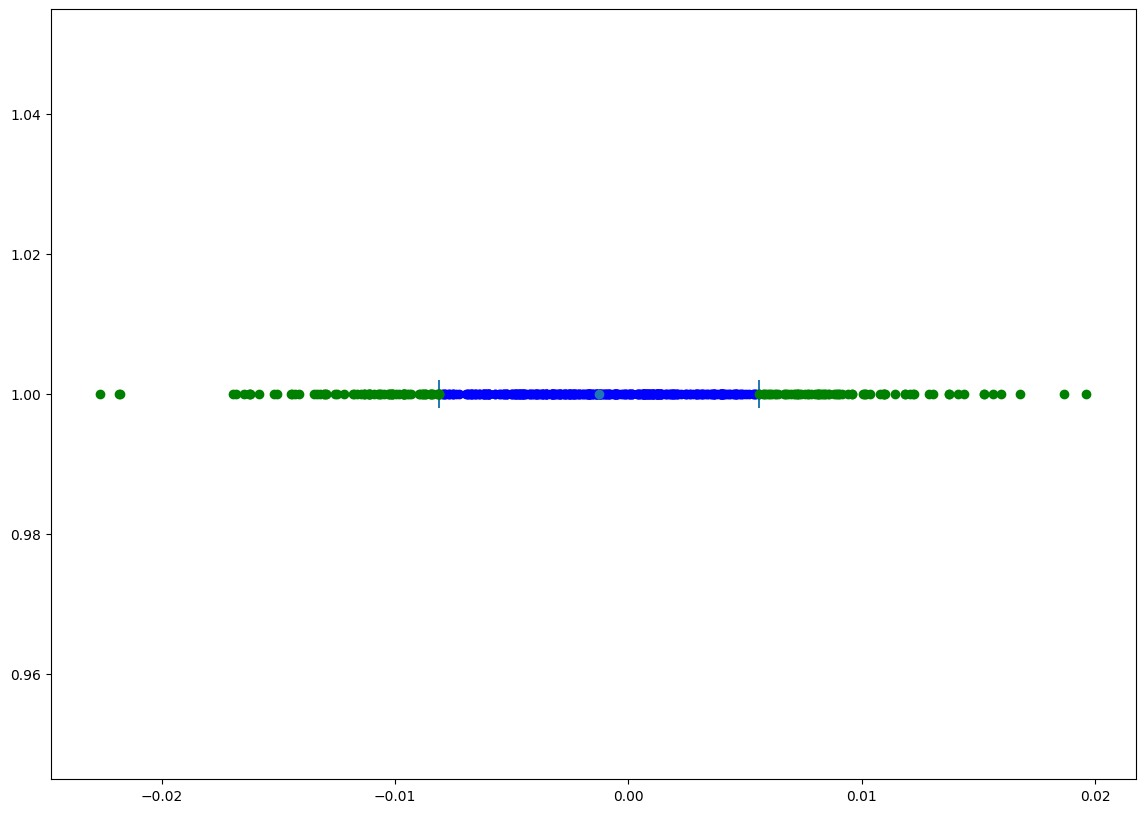

In [ ]:


path_file = f"../../data_2/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
df = pd.read_csv(path_file, sep=' ')
R = df["#ass_coeff"]
r_mean, r_std, r_err = R.mean(), R.std(), R.sem()
fig, ax = plt.subplots(figsize=(14, 10))

ax.errorbar(r_mean,1,xerr=r_std,marker='o',lw=1.4, capsize=10, capthick=1.4)
R_in = [i for i in R if abs(i-r_mean) <= r_std]
R_out = [i for i in R if abs(i-r_mean) > r_std]

ax.plot(R_in,np.ones(len(R_in)),'o', color='blue')
ax.plot(R_out,np.ones(len(R_out)),'o', color='green')
#ax.plot(R,np.ones(len(R)),'o')
#ax.set_xlim([r_mean - r_err, r_mean + r_err])

std_in = np.std(np.array(R_in), ddof=1)

R_in_err = std_in / np.sqrt(len(R_in))

print("R_size:",len(R))
print("R_in_size:",len(R_in))
print("R_out_size:",len(R_out))
print("R_ratio:",len(R_in)/len(R_out))
print("R_err:", (r_err/abs(r_mean))*100)
print("R_mean_before:", r_mean)
print("R_mean_after:", np.mean(np.array(R_in)))
print("R_err_after:", (R_in_err) / abs(np.mean(R_in))*100 )
plt.show()

                     #short_path  #diamater  #ass_coeff  \
0                        11.7527       28.0    0.019129   
1                         13.439       30.0    0.004168   
2                        12.3138       30.0    0.013303   
3                        16.2477       41.0   -0.024053   
4                         12.481       29.0    0.020091   
...                          ...        ...         ...   
29590   ,14.5407,35.0,-0.0155442        NaN         NaN   
29591   ,12.2339,29.0,-0.0110735        NaN         NaN   
29592   ,14.9835,40.0,-0.0117622        NaN         NaN   
29593    ,13.7618,30.0,0.0119777        NaN         NaN   
29594  ,13.0088,29.0,-0.00262269        NaN         NaN   

      #cod_file,#short_path,#diamater,#ass_coeff  
0                                            ,,,  
1                                            ,,,  
2                                            ,,,  
3                                            ,,,  
4                                   

/tmp/ipykernel_8892/3122258786.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True)


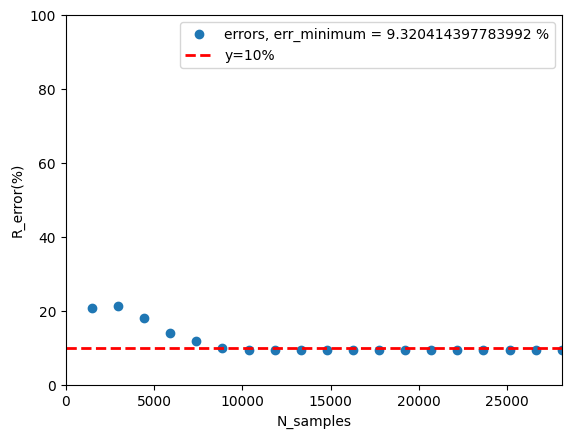

In [ ]:
n, dim, alpha_a, alpha_g = 5000, 1, 3.0, 2.0
file_path = f"../../data_2/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
#df = pd.read_csv(path_file, sep=' ')
df = pd.read_csv(file_path, delim_whitespace=True)
R = df["#ass_coeff"]
print(df)
num_samples = float(len(R))
num_points = 20
divisions = int(num_samples // num_points)
width = [(0,i*divisions) for i in range(1,num_points)]

R_err = []
R_mean = []
R_std = []
n_samples = []
C_V = []

for i in range(len(width)):
    R_err.append(R[0:width[i][1]].sem())
    R_mean.append(R[0:width[i][1]].mean())
    
    r_std = abs(R[0:width[i][1]].std())
    r_mean = abs(R[0:width[i][1]].mean())
    R_std.append(r_std)
    #print(r_std, r_mean)
    #C_V.append((/)*100)
    n_samples.append(len(R[0:width[i][1]]))

#print(R_std)
#print(R_mean)
#print(R_err)
print("N_samples:", len(R))
print(f"R_err = {abs(R.sem()/R.mean())*100} %" )
percent = [abs(i/j)*100 for i,j in zip(R_err, R_mean)]
#print([i/j for i,j in zip(R_err, R_mean)])
#plt.plot(n_samples, R_err,'o', label='errors')
plt.plot(n_samples, percent,'o', label=f'errors, err_minimum = {min(percent)} %')
plt.axhline(y=10, color='red', linestyle='--', linewidth=2, label="y=10%")  # Linha horizontal
#plt.plot(n_samples, R_mean,'o', label='means')
#plt.plot(n_samples, C_V,'o', label='means')
#plt.axhline(y=np.mean(np.array(C_V)), xmin=min(n_samples),xmax=max(n_samples))
plt.ylabel("R_error(%)")
plt.xlabel("N_samples")
plt.ylim([0, 100])
plt.xlim([0, width[-1][1]])
plt.legend()
#plt.xscale("log")
#plt.savefig("CV_n_samples.pdf")
plt.show()

In [ ]:
N, dim, alpha_a, alpha_g = 5000, 3, 12.0, 2.0
all_properties_file2(N, dim, alpha_a, alpha_g)

N = 5000, dim = 3, alpha_a = 12.0, alpha_g = 2.0
Nenhuma atualização necessária. Todos os arquivos já estavam processados.


N_samples: 877
R_err = nan %


/tmp/ipykernel_8892/3323762311.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True)


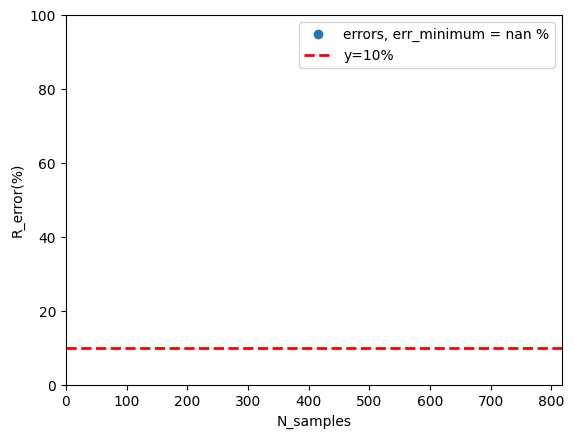

In [ ]:
n, dim, alpha_a, alpha_g = 40000, 4, 10.0, 2.0
file_path = f"../../data_2/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
#df = pd.read_csv(path_file, sep=' ')
df = pd.read_csv(file_path, delim_whitespace=True)
R = df["#ass_coeff"]

num_samples = float(len(R))
num_points = 20
divisions = int(num_samples // num_points)
width = [(0,i*divisions) for i in range(1,num_points)]

R_err = []
R_mean = []
R_std = []
n_samples = []
C_V = []

for i in range(len(width)):
    R_err.append(R[0:width[i][1]].sem())
    R_mean.append(R[0:width[i][1]].mean())
    
    r_std = abs(R[0:width[i][1]].std())
    r_mean = abs(R[0:width[i][1]].mean())
    R_std.append(r_std)
    #print(r_std, r_mean)
    #C_V.append((/)*100)
    n_samples.append(len(R[0:width[i][1]]))

#print(R_std)
#print(R_mean)
#print(R_err)
print("N_samples:", len(R))
print(f"R_err = {abs(R.sem()/R.mean())*100} %" )
percent = [abs(i/j)*100 for i,j in zip(R_err, R_mean)]
#print([i/j for i,j in zip(R_err, R_mean)])
#plt.plot(n_samples, R_err,'o', label='errors')
plt.plot(n_samples, percent,'o', label=f'errors, err_minimum = {min(percent)} %')
plt.axhline(y=10, color='red', linestyle='--', linewidth=2, label="y=10%")  # Linha horizontal
#plt.plot(n_samples, R_mean,'o', label='means')
#plt.plot(n_samples, C_V,'o', label='means')
#plt.axhline(y=np.mean(np.array(C_V)), xmin=min(n_samples),xmax=max(n_samples))
plt.ylabel("R_error(%)")
plt.xlabel("N_samples")
plt.ylim([0, 100])
plt.xlim([0, width[-1][1]])
plt.legend()
#plt.xscale("log")
#plt.savefig("CV_n_samples.pdf")
plt.show()

In [ ]:
filtered_df[filtered_df["N"]==10000].reset_index(drop=True)



,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
0,10000.0,3.0,10.0,2.0,51.0,0.547655,0.557577,71.868793,0.010315,0.970874,2.380476
1,10000.0,4.0,10.0,2.0,51.0,0.557231,0.530440,24.998502,0.012113,0.711656,1.624325
2,10000.0,3.0,11.0,2.0,2287.0,0.101177,0.699022,12.052079,0.010975,0.146924,2.428415
3,10000.0,3.0,12.0,2.0,51.0,0.612416,0.639043,33.761237,0.011159,0.969379,2.398529
4,10000.0,4.0,12.0,2.0,51.0,0.915458,0.912626,509.746922,0.011045,1.170676,2.812995
5,10000.0,3.0,14.0,2.0,51.0,0.777799,0.825723,23.670235,0.013675,1.172566,2.968594
6,10000.0,4.0,14.0,2.0,51.0,0.702636,0.708174,22.767787,0.009675,0.968682,2.333053
7,10000.0,4.0,15.0,2.0,51.0,0.652443,0.654341,29.312199,0.013299,0.955789,2.319398
8,10000.0,3.0,15.0,2.0,51.0,0.604741,0.647900,19.773953,0.012639,1.057979,2.648862


In [ ]:
filtered_df

NameError: name 'filtered_df' is not defined

       #short_path  #diamater  #ass_coeff
0          14.1308         30    0.003659
1          13.6079         34   -0.004645
2          13.1941         31    0.003141
3          13.3144         33   -0.010219
4          13.6317         32   -0.013444
...            ...        ...         ...
40806      12.7525         29   -0.014356
40807      13.1718         33    0.014559
40808      13.1680         31   -0.027495
40809      13.1880         33   -0.004659
40810      12.8113         30    0.024594

[40811 rows x 3 columns]
N_samples: 40811
R_err = 135.05844853941974 %


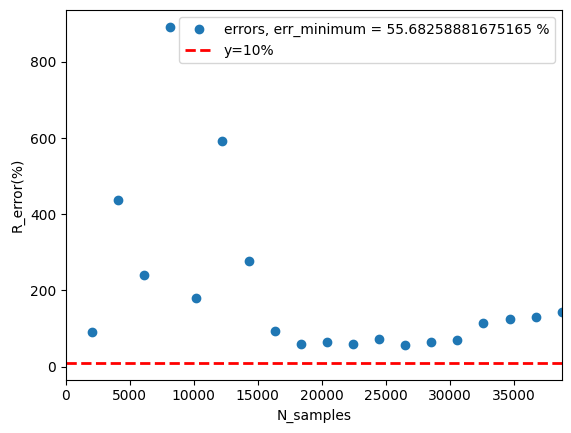

In [ ]:
n, dim, alpha_a, alpha_g = 5000, 3, 12.0, 2.0
file_path = f"../../data_2/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
#df = pd.read_csv(path_file, sep=' ')
df = pd.read_csv(file_path, sep=' ')
R = df["#ass_coeff"]
print(df)
num_samples = float(len(R))
num_points = 20
divisions = int(num_samples // num_points)
width = [(0,i*divisions) for i in range(1,num_points)]

R_err = []
R_mean = []
R_std = []
n_samples = []
C_V = []

for i in range(len(width)):
    R_err.append(R[0:width[i][1]].sem())
    R_mean.append(R[0:width[i][1]].mean())
    
    r_std = abs(R[0:width[i][1]].std())
    r_mean = abs(R[0:width[i][1]].mean())
    R_std.append(r_std)
    #print(r_std, r_mean)
    #C_V.append((/)*100)
    n_samples.append(len(R[0:width[i][1]]))

#print(R_std)
#print(R_mean)
#print(R_err)
print("N_samples:", len(R))
print(f"R_err = {abs(R.sem()/R.mean())*100} %" )
percent = [abs(i/j)*100 for i,j in zip(R_err, R_mean)]
#print([i/j for i,j in zip(R_err, R_mean)])
#plt.plot(n_samples, R_err,'o', label='errors')
plt.plot(n_samples, percent,'o', label=f'errors, err_minimum = {min(percent)} %')
plt.axhline(y=10, color='red', linestyle='--', linewidth=2, label="y=10%")  # Linha horizontal
#plt.plot(n_samples, R_mean,'o', label='means')
#plt.plot(n_samples, C_V,'o', label='means')
#plt.axhline(y=np.mean(np.array(C_V)), xmin=min(n_samples),xmax=max(n_samples))
plt.ylabel("R_error(%)")
plt.xlabel("N_samples")
#plt.ylim([0, 100])
plt.xlim([0, width[-1][1]])
plt.legend()
#plt.xscale("log")
#plt.savefig("CV_n_samples.pdf"')
plt.show()

R_size: 51
σ: 0.011195653034690932
R_mean: 0.04047569607843137
R_in_size: 37
R_out_size: 14
R_ratio: 2.642857142857143
R_err: 3.873200831873877
R_mean_in: 0.040850889189189186
R_err_int: 2.6184743850147605


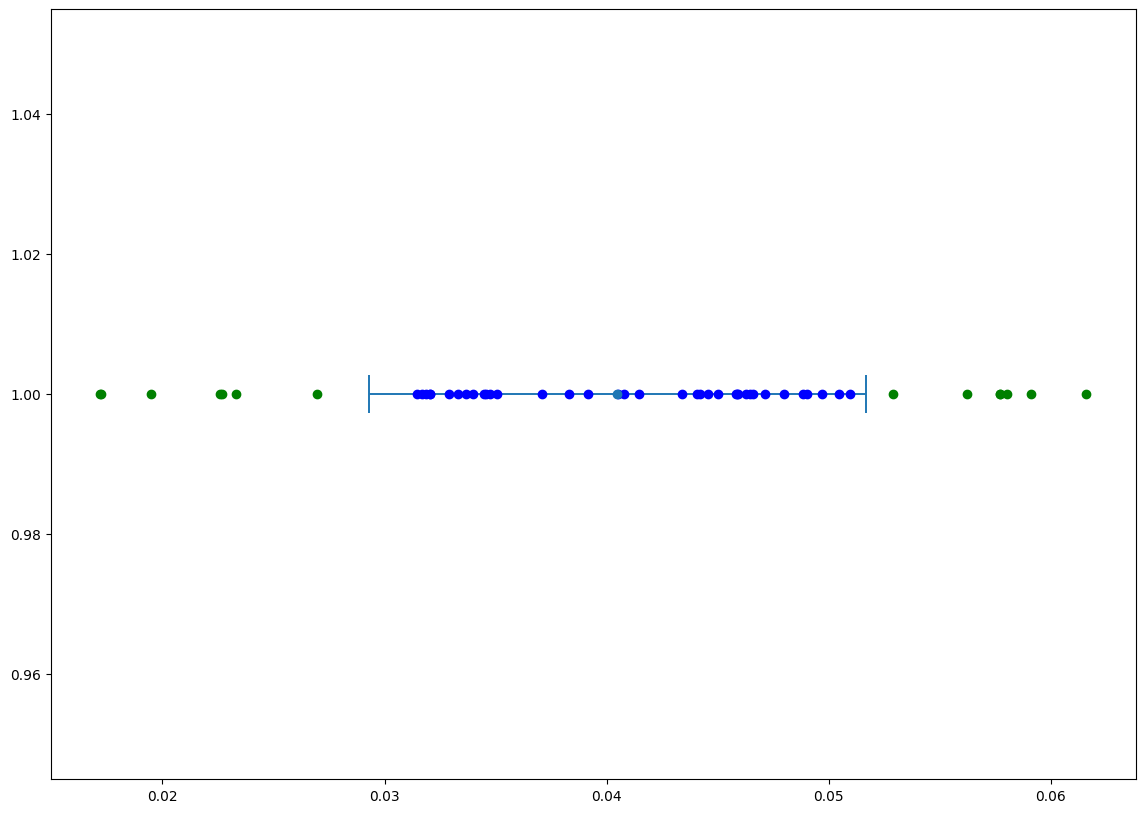

In [ ]:
n = 5000
dim, alpha_a, alpha_g = 1, 8.0, 3.0
path_file = f"../../data/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
df = pd.read_csv(path_file, sep=',')
R = df["#ass_coeff"]

r_mean, r_std, r_err = R.mean(), R.std(), R.sem()
fig, ax = plt.subplots(figsize=(14, 10))

ax.errorbar(r_mean,1,xerr=r_std,marker='o',lw=1.4, capsize=14 ,capthick=1.4)

R_in = [i for i in R if abs(i-r_mean) <= r_std]
R_out = [i for i in R if abs(i-r_mean) > r_std]

ax.plot(R_in,np.ones(len(R_in)),'o', color='blue')
ax.plot(R_out,np.ones(len(R_out)),'o', color='green')

std_in = np.std(np.array(R_in), ddof=1)

R_in_err = std_in / np.sqrt(len(R_in))

print("R_size:",len(R))
print("σ:", r_std)
print("R_mean:", r_mean)
print("R_in_size:",len(R_in))
print("R_out_size:",len(R_out))
print("R_ratio:",len(R_in)/len(R_out))
print("R_err:", (r_err/abs(r_mean))*100)
print("R_mean_in:", np.mean(np.array(R_in)))

print("R_err_int:", (R_in_err) / abs(np.mean(R_in))*100 )
#ax.set_xlim([r_mean - r_err, r_mean + r_err])
plt.show()

In [ ]:
filtered_df

,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
0,320000.0,4.0,0.0,2.0,7.0,1.090394,0.368028,10.231336,0.004835,0.816340,0.786796
1,160000.0,4.0,1.0,2.0,12.0,1.872601,0.751579,11.744720,0.010087,1.443839,1.621354
2,320000.0,3.0,1.0,2.0,7.0,1.500937,0.486508,17.693658,0.010579,2.294106,2.115701
3,5000.0,1.0,3.0,2.0,1153.0,0.213912,0.984802,23.727713,0.013232,0.308754,3.442902
4,320000.0,4.0,3.0,2.0,7.0,2.821308,0.918413,16.063719,0.013894,3.125044,2.870208
...,...,...,...,...,...,...,...,...,...,...,...
69,10000.0,4.0,14.0,2.0,51.0,0.702636,0.708174,22.767787,0.009675,0.968682,2.333053
70,10000.0,4.0,15.0,2.0,51.0,0.652443,0.654341,29.312199,0.013299,0.955789,2.319398
71,10000.0,3.0,15.0,2.0,51.0,0.604741,0.647900,19.773953,0.012639,1.057979,2.648862
72,5000.0,3.0,15.0,2.0,101.0,0.581701,0.792137,17.939215,0.013582,0.832939,2.689473


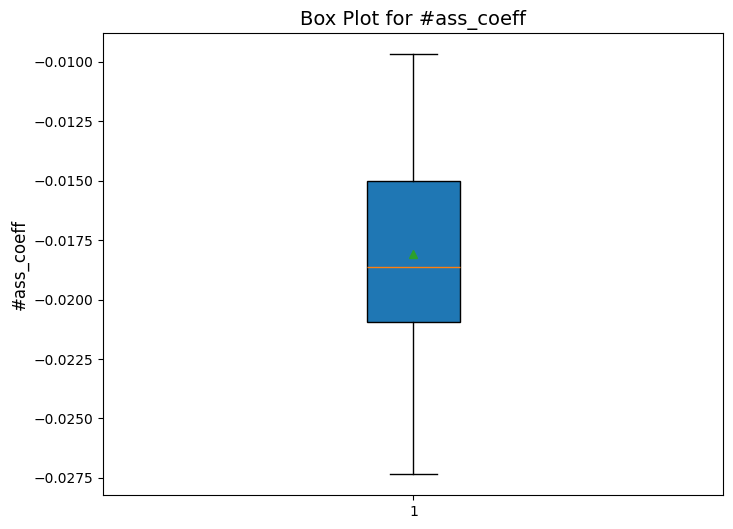

In [ ]:
# box_plot
n=320000
dim = 1
alpha_a, alpha_g = 0.0, 2.0
path_file = f"../../data/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
a = pd.read_csv(path_file, sep=',')

plt.figure(figsize=(8, 6))
plt.boxplot(a["#ass_coeff"], vert=True, patch_artist=True, showmeans=True)
plt.title("Box Plot for #ass_coeff", fontsize=14)
plt.ylabel("#ass_coeff", fontsize=12)
plt.show()

In [ ]:
filtered_df[filtered_df["N"]==320000]

,N,dim,alpha_a,alpha_g,N_samples,per_short,std_short,per_ass,std_ass,per_dia,std_dia
0,320000.0,4.0,0.0,2.0,7.0,1.090394,0.368028,10.231336,0.004835,0.816340,0.786796
2,320000.0,3.0,1.0,2.0,7.0,1.500937,0.486508,17.693658,0.010579,2.294106,2.115701
4,320000.0,4.0,3.0,2.0,7.0,2.821308,0.918413,16.063719,0.013894,3.125044,2.870208
6,320000.0,2.0,5.0,2.0,7.0,1.009802,0.533346,19.768038,0.002123,1.245705,1.676163
10,320000.0,3.0,6.0,2.0,7.0,2.266597,1.107668,15.536231,0.004087,1.598755,1.951800
13,320000.0,3.0,7.0,2.0,24.0,0.728681,0.685694,29.421829,0.002838,0.929982,2.145099
16,320000.0,3.0,8.0,2.0,24.0,0.605613,0.584853,27.449370,0.002738,1.119827,2.697288
22,320000.0,4.0,8.0,2.0,9.0,1.634044,0.887598,16.226056,0.003210,2.618745,3.640055
23,320000.0,4.0,9.0,2.0,23.0,0.740318,0.660922,16.529770,0.003231,1.052438,2.359071
29,320000.0,3.0,9.0,2.0,7.0,1.613732,0.852971,13.506019,0.002620,2.766193,3.638419


In [ ]:
N = 20000
dim = [2, 3, 4, 3, 4, 4]
alpha_a = [6.0, 9.0, 10.0, 10.0, 11.0, 12.0]
alpha_g = 2.0

     #short_path  #diamater  #ass_coeff
0        15.9340         39   -0.003165
1        16.4427         41   -0.002603
2        16.0665         40   -0.000693
3        16.0711         40    0.003224
4        16.6337         41    0.004401
..           ...        ...         ...
500      16.5684         40   -0.008664
501      16.1779         40    0.000608
502      16.3075         40    0.005417
503      16.2347         39   -0.011448
504      16.1637         40   -0.005305

[505 rows x 3 columns]
N_samples: 505
R_err = 11.459549527562384 %


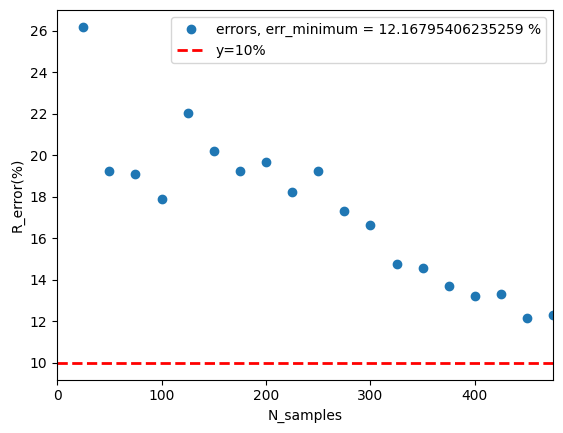

In [ ]:
n, dim, alpha_a, alpha_g = 40000, 3, 8.0, 2.0
file_path = f"../../data_2/N_{n}/dim_{dim}/alpha_a_{alpha_a}_alpha_g_{alpha_g}/properties_set.txt"
# Criar um DataFrame
#df = pd.read_csv(path_file, sep=' ')
df = pd.read_csv(file_path, sep=' ')
R = df["#ass_coeff"]
print(df)
num_samples = float(len(R))
num_points = 20
divisions = int(num_samples // num_points)
width = [(0,i*divisions) for i in range(1,num_points)]

R_err = []
R_mean = []
R_std = []
n_samples = []
C_V = []

for i in range(len(width)):
    R_err.append(R[0:width[i][1]].sem())
    R_mean.append(R[0:width[i][1]].mean())
    
    r_std = abs(R[0:width[i][1]].std())
    r_mean = abs(R[0:width[i][1]].mean())
    R_std.append(r_std)
    #print(r_std, r_mean)
    #C_V.append((/)*100)
    n_samples.append(len(R[0:width[i][1]]))

#print(R_std)
#print(R_mean)
#print(R_err)
print("N_samples:", len(R))
print(f"R_err = {abs(R.sem()/R.mean())*100} %" )
percent = [abs(i/j)*100 for i,j in zip(R_err, R_mean)]
#print([i/j for i,j in zip(R_err, R_mean)])
#plt.plot(n_samples, R_err,'o', label='errors')
plt.plot(n_samples, percent,'o', label=f'errors, err_minimum = {min(percent)} %')
plt.axhline(y=10, color='red', linestyle='--', linewidth=2, label="y=10%")  # Linha horizontal
#plt.plot(n_samples, R_mean,'o', label='means')
#plt.plot(n_samples, C_V,'o', label='means')
#plt.axhline(y=np.mean(np.array(C_V)), xmin=min(n_samples),xmax=max(n_samples))
plt.ylabel("R_error(%)")
plt.xlabel("N_samples")
#plt.ylim([0, 100])
plt.xlim([0, width[-1][1]])
plt.legend()
#plt.xscale("log")
#plt.savefig("CV_n_samples.pdf"')
plt.show()